# Dataset preparation

In [1]:
# install libraries
! pip install -q datasets transformers sentence_transformers faiss-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 63.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 16.1.0 which i

In [2]:
# insert your huggingface API key in the "Secret" section in Colab with name = "huggingface". Make sure the huggingface key generated has the "write" access!
from huggingface_hub import notebook_login
notebook_login()

In [3]:
from google.colab import files
uploaded = files.upload()

Saving medquad.csv to medquad.csv


In [4]:
import pandas as pd


df = pd.read_csv(list(uploaded.keys())[0])
df.head(10)

,question,answer,source,focus_area
0,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma
1,What causes Glaucoma ?,"Nearly 2.7 million people have glaucoma, a lea...",NIHSeniorHealth,Glaucoma
2,What are the symptoms of Glaucoma ?,Symptoms of Glaucoma Glaucoma can develop in ...,NIHSeniorHealth,Glaucoma
3,What are the treatments for Glaucoma ?,"Although open-angle glaucoma cannot be cured, ...",NIHSeniorHealth,Glaucoma
4,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma
5,What is (are) Glaucoma ?,The optic nerve is a bundle of more than 1 mil...,NIHSeniorHealth,Glaucoma
6,What is (are) Glaucoma ?,Open-angle glaucoma is the most common form of...,NIHSeniorHealth,Glaucoma
7,Who is at risk for Glaucoma? ?,Anyone can develop glaucoma. Some people are a...,NIHSeniorHealth,Glaucoma
8,How to prevent Glaucoma ?,"At this time, we do not know how to prevent gl...",NIHSeniorHealth,Glaucoma
9,What are the symptoms of Glaucoma ?,"At first, open-angle glaucoma has no symptoms....",NIHSeniorHealth,Glaucoma


In [5]:
from datasets import Dataset,  DatasetDict
from sklearn.model_selection import train_test_split

# Split the DataFrame into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.1, random_state=42)

# Convert DataFrames to Hugging Face datasets
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)

dataset = Dataset.from_pandas(df)

# Combine into a DatasetDict
dataset = DatasetDict({
    'train': train_dataset,
    'validation': val_dataset
})

In [6]:
# read as pandas dataframe
# Here where the important in practice. Make sure the dataset has been sanitize and clean! This is where data engineering works need to be done before training the model.
dataset["train"].to_pandas()

,question,answer,source,focus_area,__index_level_0__
0,Is Primary carnitine deficiency inherited ?,How is primary carnitine deficiency inherited?...,GARD,Primary carnitine deficiency,7770
1,What is (are) Bronchiectasis ?,Bronchiectasis (brong-ke-EK-ta-sis) is a condi...,NHLBI,Bronchiectasis,8298
2,Is lysinuric protein intolerance inherited ?,This condition is inherited in an autosomal re...,GHR,lysinuric protein intolerance,11133
3,How many people are affected by Unverricht-Lun...,Progressive myoclonus epilepsy is a rare condi...,GHR,Unverricht-Lundborg disease,10446
4,"What causes Megalencephaly, polymicrogyria, an...","What causes megalencephaly, polymicrogyria, an...",GARD,"Megalencephaly, polymicrogyria, and hydrocepha...",7660
...,...,...,...,...,...
14765,What are the treatments for Langer mesomelic d...,These resources address the diagnosis or manag...,GHR,Langer mesomelic dysplasia,11284
14766,What are the treatments for hereditary xanthin...,These resources address the diagnosis or manag...,GHR,hereditary xanthinuria,11964
14767,What are the symptoms of Hallermann-Streiff sy...,What are the signs and symptoms of Hallermann-...,GARD,Hallermann-Streiff syndrome,5390
14768,Who is at risk for Uterine Sarcoma? ?,Being exposed to x-rays can increase the risk ...,CancerGov,Uterine Sarcoma,860


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/746 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/435 [00:00<?, ?B/s]

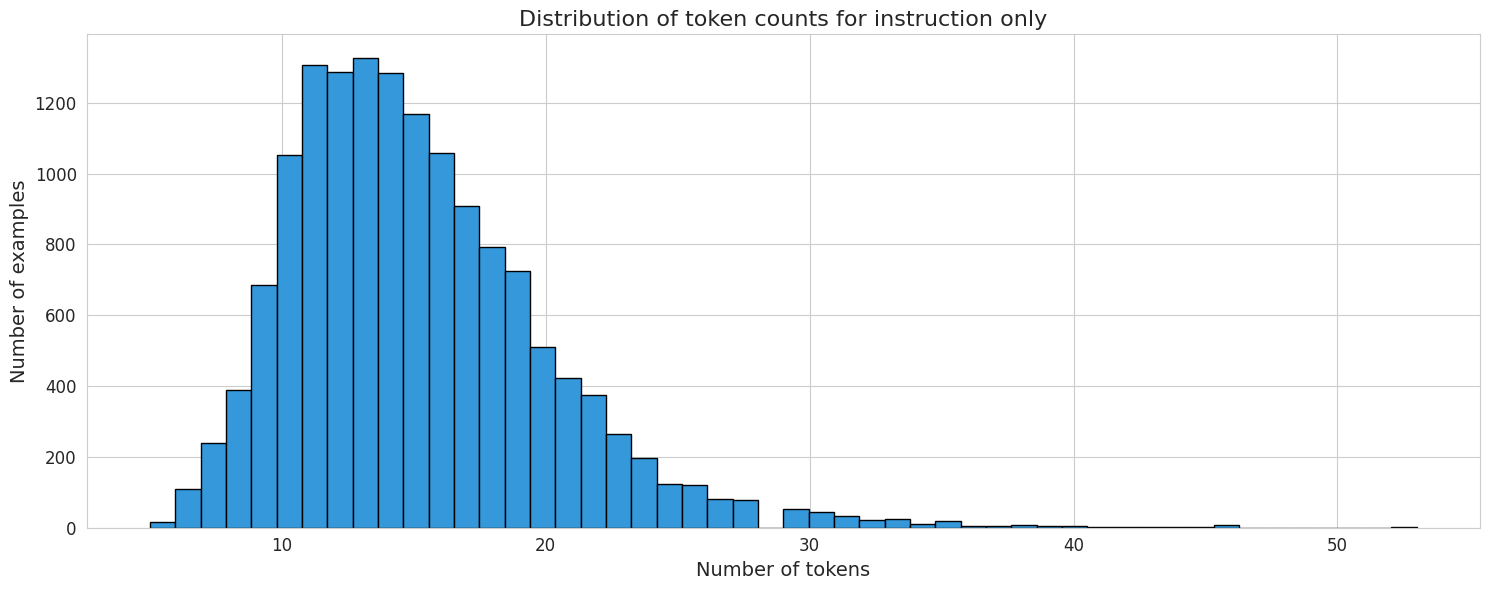

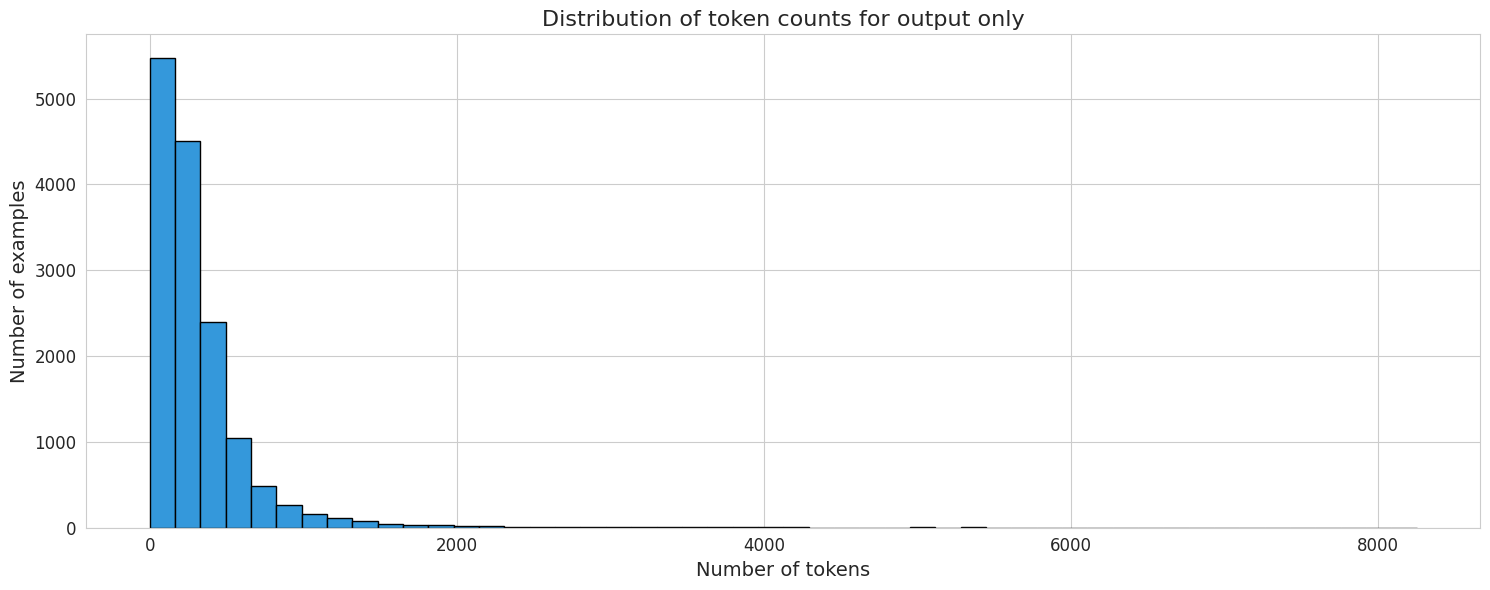

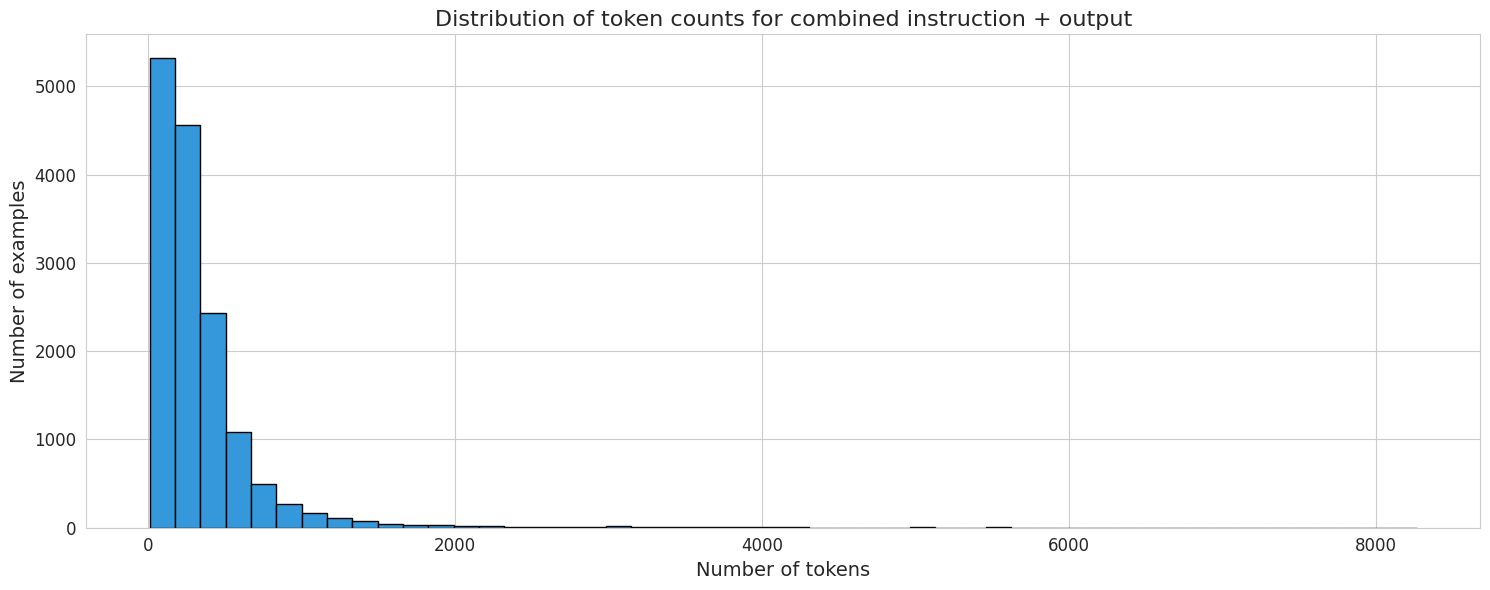

In [7]:
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
import seaborn as sns

# Fill null values with empty strings
df['question'] = df['question'].fillna('')
df['answer'] = df['answer'].fillna('')

# Split the DataFrame into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.1, random_state=42)

# Convert DataFrames to Hugging Face datasets
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)

# Combine into a DatasetDict
dataset = DatasetDict({
    'train': train_dataset,
    'validation': val_dataset
})

# 1. Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("NousResearch/Llama-2-7b-hf")

# 2. Tokenize each row and count the number of tokens
instruction_token_counts = [len(tokenizer.tokenize(str(example["question"]))) for example in dataset['train']]
output_token_counts = [len(tokenizer.tokenize(str(example["answer"]))) for example in dataset['train']]
combined_token_counts = [instruction + output for instruction, output in zip(instruction_token_counts, output_token_counts)]

# Helper function to plot the distributions
def plot_distribution(token_counts, title):
    sns.set_style("whitegrid")
    plt.figure(figsize=(15, 6))
    plt.hist(token_counts, bins=50, color='#3498db', edgecolor='black')
    plt.title(title, fontsize=16)
    plt.xlabel("Number of tokens", fontsize=14)
    plt.ylabel("Number of examples", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

# Plot the distribution of token counts
plot_distribution(instruction_token_counts, "Distribution of token counts for instruction only")
plot_distribution(output_token_counts, "Distribution of token counts for output only")
plot_distribution(combined_token_counts, "Distribution of token counts for combined instruction + output")

The number of token is important to know the model context window. For Llama there is 2048 tokens context window.

## 3. Filter out rows with more than 2048 tokens

I need to remove samples with more than 2048 tokens (max context size of Llama 2 by default = 4096).

In [8]:
# Filter out rows with more than 2048 tokens(Just for example on how to filter token if using a pretrain model that support lower default token limit)
valid_indices = [i for i, count in enumerate(combined_token_counts) if count <= 2048]
print(f"Number of valid rows: {len(valid_indices)}")
print(f"Removing {len(dataset['train']) - len(valid_indices)} rows...")

Number of valid rows: 14626
Removing 144 rows...


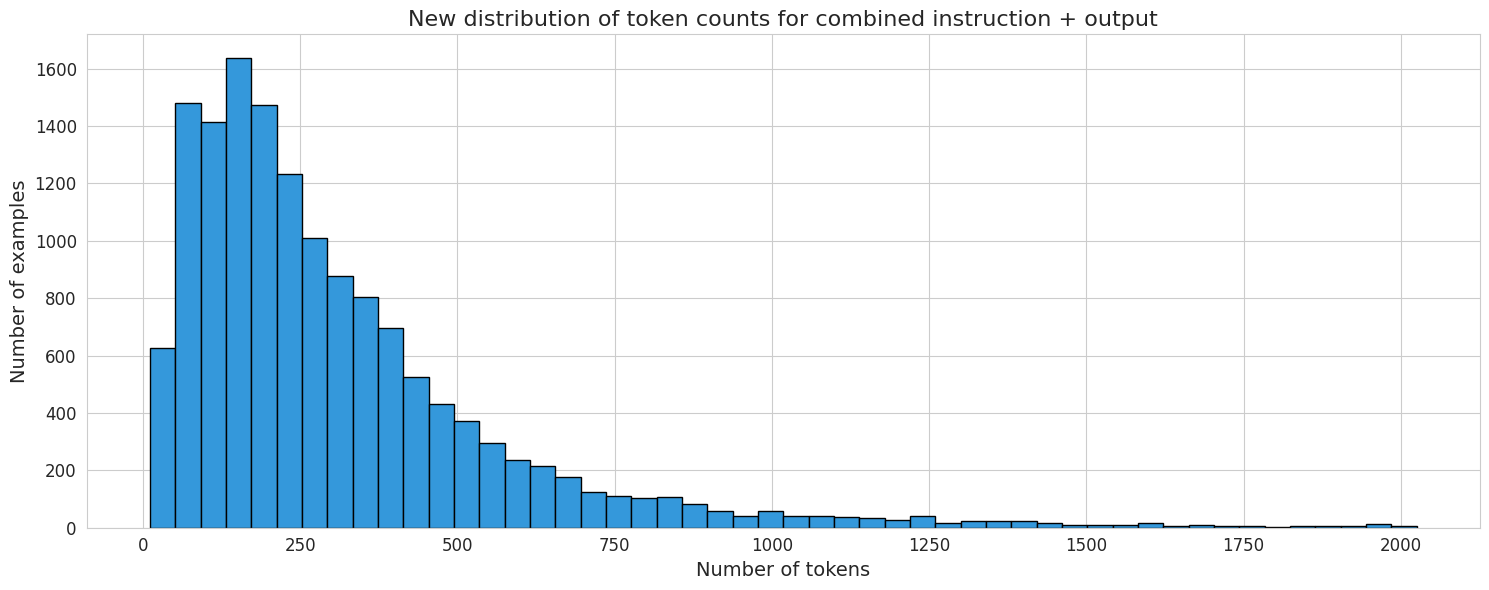

In [9]:
# Extract valid rows based on valid_indices
dataset['train'] = dataset['train'].select(valid_indices)

# Get token counts for valid rows
token_counts = [combined_token_counts[i] for i in valid_indices]

plot_distribution(token_counts, "New distribution of token counts for combined instruction + output")

## 4. Near-deduplication Using Embeddings




Importance of Near-Deduplication

- Improves Model Performance: Duplicate or highly similar examples in your dataset can lead to overfitting. The model might learn to memorize the training data rather than generalize from it. Removing duplicates ensures that the model learns more diverse representations of the data.

- Reduces Bias: Duplication can introduce bias into the dataset, where certain examples are over-represented. This can skew the model's predictions towards the duplicated data, reducing its fairness and robustness.

- Efficient Use of Resources: Training on a dataset with duplicates wastes computational resources. By removing duplicates, training becomes more efficient, both in terms of time and memory usage.

- Cleaner Dataset: Deduplication helps in maintaining a cleaner and more accurate dataset, which is crucial for reliable model evaluation and inference.

In [10]:
from sentence_transformers import SentenceTransformer
import faiss
from datasets import Dataset, DatasetDict
from tqdm.autonotebook import tqdm #for loading bar
import numpy as np

In [ ]:
def deduplicate_dataset(dataset: Dataset, model: str, threshold: float):
    sentence_model = SentenceTransformer(model)
    outputs = [example["answer"] for example in dataset['train']]

    print("Converting text to embeddings...")
    embeddings = sentence_model.encode(outputs, show_progress_bar=True)
    dimension = embeddings.shape[1]
    index = faiss.IndexFlatIP(dimension)
    normalized_embeddings = embeddings / np.linalg.norm(embeddings, axis=1, keepdims=True)
    index.add(normalized_embeddings)

    print("Filtering out near-duplicates...")
    D, I = index.search(normalized_embeddings, k=2) # return at least 2 vectors
    to_keep = []

    for i in tqdm(range(len(embeddings)), desc="Filtering"):
        # If the second closest vector (D[i, 1]) has cosine similarity above the threshold
        if D[i, 1] >= threshold:
            # Check if either the current item or its nearest neighbor is already in the to_keep list
            nearest_neighbor = I[i, 1]
            if i not in to_keep and nearest_neighbor not in to_keep:
                # If not, add the current item to the list
                to_keep.append(i)
        else:
            # If the similarity is below the threshold, always keep the current item
            to_keep.append(i)

    dataset = dataset['train'].select(to_keep)
    return DatasetDict({"train": dataset})


model = "NousResearch/Llama-2-7b-hf"
threshold = 0.95
deduped_dataset = deduplicate_dataset(dataset, model, threshold)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

## 5. Top-k Sampling

Only keep the top k samples with the most tokens.

In [ ]:
# Get the top k rows with the most tokens
def get_top_k_rows(dataset, token_counts, k):
    # Sort by descending token count and get top k indices
    sorted_indices = sorted(range(len(token_counts)), key=lambda i: token_counts[i], reverse=True)
    top_k_indices = sorted_indices[:k]

    # Extract top k rows
    top_k_data = {
        "question": [dataset['train'][i]["question"] for i in top_k_indices],
        "answer": [dataset['train'][i]["answer"] for i in top_k_indices]
    }

    return Dataset.from_dict(top_k_data)

# Get token counts
instruction_token_counts = [len(tokenizer.tokenize(example["question"])) for example in deduped_dataset['train']]
output_token_counts = [len(tokenizer.tokenize(example["answer"])) for example in deduped_dataset['train']]
combined_token_counts = [instruction + output for instruction, output in zip(instruction_token_counts, output_token_counts)]

k = 1000  # Adjust this value as needed
top_k_dataset = get_top_k_rows(deduped_dataset, combined_token_counts, k)

# Save these rows in a Dataset object with a 'train' split
dataset = DatasetDict({"train": top_k_dataset})

In [ ]:
instruction_token_counts = [len(tokenizer.tokenize(example["question"])) for example in dataset['train']]
output_token_counts = [len(tokenizer.tokenize(example["answer"])) for example in dataset['train']]
combined_token_counts = [instruction + output for instruction, output in zip(instruction_token_counts, output_token_counts)]

# Plot the distribution of token counts
plot_distribution(instruction_token_counts, "Distribution of token counts for instruction only")
plot_distribution(output_token_counts, "Distribution of token counts for output only")
plot_distribution(combined_token_counts, "Distribution of token counts for combined instruction + output")

In [ ]:
# Read as pandas DataFrame
dataset['train'].to_pandas()

Checking the top 𝑘
k sampling, especially in the context of dataset preparation for model training or evaluation, can be important for several reasons:

- Quality of Examples:

By selecting the top 𝑘
k examples with the most tokens, you may be ensuring that the most informative and detailed examples are being prioritized. This can help in focusing on complex and richly annotated data which can be beneficial for model learning.

- Model Robustness:

Training or evaluating with examples that have a high number of tokens can test the model's ability to handle long and complex inputs, which is crucial for applications like summarization, translation, or any task requiring the understanding of lengthy texts.

- Efficiency:

Focusing on the top 𝑘
k examples can also be a way to efficiently use computational resources, especially if you are limited in terms of time or processing power. By using the most informative examples, you might achieve better performance with less data.

- Benchmarking:

When comparing different models or versions of the same model, using a subset of data with certain characteristics (e.g., high token count) can provide a consistent benchmark to evaluate performance, ensuring that the comparisons are fair and based on challenging examples.

- Handling Edge Cases:

The top 𝑘
k examples might include edge cases or more difficult instances that the model needs to handle. This helps in improving the model's generalization ability by exposing it to a variety of complex scenarios during training or evaluation.

## 6. Chat templates

We need to define a **chat template**, which formats the instructions and responses in a way that is suitable for the model. Here's an example of raw instructions and responses from a [Hugging Face blog post](https://huggingface.co/blog/chat-templates):

```
[
    {"role": "user", "content": "Hi there!"},
    {"role": "assistant", "content": "Nice to meet you!"}
]
```

There are different ways to format it. The most straightforward one would be:

```
User: Hey there!
Assistant: Nice to meet you!
```

In the case of Llama 2, the authors used the following template for the **chat models**:

```
<s>[INST] <<SYS>>
System prompt
<</SYS>>

User prompt [/INST] Model answer </s>
```

Currently, the most popular and standardized chat template is ChatML from OpenAI, which looks like this:

```
<|im_start|>user
Hey there!<|im_end|>
<|im_start|>assistant
Nice to meet you!<|im_end|>
```

The impact of chat templates on the performance of the model is unclear. In most cases, we fine-tune base models that have not been trained with a particular template, which is also why there's no clear standard. However, they are important as they can cause many issues and limit the compatibility of the models.

In [ ]:
def chat_template(example):
    example["instruction"] = f"### Instruction:\n{example['instruction']}\n\n### Response:\n"
    return example

dataset = dataset.map(chat_template)

In [ ]:
dataset['train'].to_pandas()

In [ ]:
# Optional: push to Hugging Face Hub
dataset.push_to_hub("mini-platypus-clean", token=hf_token)